In [1]:
import pandas as pd
import numpy as np


In [2]:
from pycaret.datasets import get_data
from pycaret.regression import setup
from pycaret.regression import compare_models
from pycaret.regression import create_model
from pycaret.regression import tune_model
import dfconverter


In [7]:
raw_df1 = pd.read_csv("new_testdata/test-277.csv")
raw_df2 = pd.read_csv("new_testdata/test-311.csv")
raw_df3 = pd.read_csv("new_testdata/test-361.csv")
raw_df4 = pd.read_csv("new_testdata/test-374.csv")

df1 = dfconverter.converter(raw_df1)
df2 = dfconverter.converter(raw_df2)
df3 = dfconverter.converter(raw_df3)
df4 = dfconverter.converter(raw_df4)

display(df1)
display(df2)
display(df3)
display(df4)

# テストデータ作成
test_df = pd.concat([df1, df2, df3, df4])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   _time         8470 non-null   datetime64[ns, Asia/Tokyo]
 1   _measurement  8470 non-null   object                    
 2   co2           8470 non-null   float64                   
 3   humidity      8470 non-null   float64                   
 4   temperature   8470 non-null   float64                   
dtypes: datetime64[ns, Asia/Tokyo](1), float64(3), object(1)
memory usage: 331.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   _time         8000 non-null   datetime64[ns, Asia/Tokyo]
 1   _measurement  8000 non-null   object                    
 2   co2        

,co2,humidity,temperature,seat_num,y
1682,502.0,17.1,25.5,80,0
1683,501.0,17.0,25.5,80,0
1684,502.0,17.1,25.5,80,0
1685,503.0,17.1,25.5,80,0
1686,505.0,17.1,25.5,80,0
...,...,...,...,...,...
8465,567.0,17.7,27.4,80,0
8466,567.0,17.7,27.4,80,0
8467,567.0,17.7,27.4,80,0
8468,567.0,17.6,27.4,80,0


,co2,humidity,temperature,seat_num,y
1589,536.0,25.1,23.6,183,0
1590,536.0,25.1,23.6,183,0
1591,537.0,25.1,23.7,183,0
1592,537.0,25.1,23.7,183,0
1593,537.0,25.1,23.7,183,0
...,...,...,...,...,...
7995,706.0,24.4,25.8,183,0
7996,703.0,24.4,25.8,183,0
7997,702.0,24.5,25.8,183,0
7998,701.0,24.5,25.8,183,0


,co2,humidity,temperature,seat_num,y
1614,676.0,23.7,24.3,56,1
1615,685.0,23.7,24.3,56,1
1616,694.0,23.7,24.3,56,1
1617,706.0,23.7,24.4,56,1
1618,711.0,23.7,24.4,56,1
...,...,...,...,...,...
8116,600.0,24.5,24.6,56,0
8117,598.0,24.5,24.6,56,0
8118,598.0,24.6,24.6,56,0
8119,599.0,24.6,24.6,56,0


,co2,humidity,temperature,seat_num,y
1510,493.0,18.2,24.0,56,0
1511,493.0,18.3,24.1,56,0
1512,492.0,18.1,24.1,56,0
1513,493.0,18.0,24.1,56,0
1514,493.0,17.9,24.1,56,0
...,...,...,...,...,...
7418,558.0,21.9,25.1,56,0
7419,559.0,21.9,25.1,56,0
7420,559.0,21.9,25.1,56,0
7421,558.0,21.9,25.1,56,0


In [8]:
test_df


,co2,humidity,temperature,seat_num,y
1682,502.0,17.1,25.5,80,0
1683,501.0,17.0,25.5,80,0
1684,502.0,17.1,25.5,80,0
1685,503.0,17.1,25.5,80,0
1686,505.0,17.1,25.5,80,0
...,...,...,...,...,...
7418,558.0,21.9,25.1,56,0
7419,559.0,21.9,25.1,56,0
7420,559.0,21.9,25.1,56,0
7421,558.0,21.9,25.1,56,0


In [10]:
test_df.to_csv("test_data.csv")


In [15]:
test_df = pd.read_csv("test_data.csv")
test_df


,Unnamed: 0,co2,humidity,temperature,seat_num,y
0,1682,502.0,17.1,25.5,80,0.0
1,1683,501.0,17.0,25.5,80,0.0
2,1684,502.0,17.1,25.5,80,0.0
3,1685,503.0,17.1,25.5,80,0.0
4,1686,505.0,17.1,25.5,80,0.0
...,...,...,...,...,...,...
14889,7418,558.0,21.9,25.1,56,0.0
14890,7419,559.0,21.9,25.1,56,0.0
14891,7420,559.0,21.9,25.1,56,0.0
14892,7421,558.0,21.9,25.1,56,0.0


In [18]:
list(test_df)


['Unnamed: 0', 'co2', 'humidity', 'temperature', 'seat_num', 'y']

In [19]:
test_df = test_df.drop(columns=[list(test_df)[0]])
test_df


,co2,humidity,temperature,seat_num,y
0,502.0,17.1,25.5,80,0.0
1,501.0,17.0,25.5,80,0.0
2,502.0,17.1,25.5,80,0.0
3,503.0,17.1,25.5,80,0.0
4,505.0,17.1,25.5,80,0.0
...,...,...,...,...,...
14889,558.0,21.9,25.1,56,0.0
14890,559.0,21.9,25.1,56,0.0
14891,559.0,21.9,25.1,56,0.0
14892,558.0,21.9,25.1,56,0.0


In [43]:
train_df = pd.read_csv("alldata2.csv")
train_df = train_df.drop(columns=["Unnamed: 0"])
train_df


,co2,humidity,temperature,y
0,536.0,29.2,25.6,0.0
1,536.0,29.2,25.6,0.0
2,537.0,29.1,25.6,0.0
3,538.0,29.2,25.6,0.0
4,538.0,29.1,25.6,0.0
...,...,...,...,...
29110,788.0,23.1,27.2,1.0
29111,788.0,23.1,27.2,1.0
29112,789.0,23.1,27.2,1.0
29113,788.0,23.1,27.2,1.0


In [20]:
setup(data=test_df, target="y", session_id=0, index=False)


,Description,Value
0,Session id,0
1,Target,y
2,Target type,Regression
3,Original data shape,"(14894, 5)"
4,Transformed data shape,"(14894, 5)"
5,Transformed train set shape,"(10425, 5)"
6,Transformed test set shape,"(4469, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [44]:
s = setup(data=train_df, target="y", session_id=1, index=False)


,Description,Value
0,Session id,1
1,Target,y
2,Target type,Regression
3,Original data shape,"(29115, 4)"
4,Transformed data shape,"(29115, 4)"
5,Transformed train set shape,"(20380, 4)"
6,Transformed test set shape,"(8735, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [45]:
from pycaret.regression import *

get_config("train_transformed")


,co2,humidity,temperature,y
0,938.0,34.599998,27.200001,0.0
1,660.0,20.400000,26.400000,0.3
2,1037.0,28.000000,27.400000,1.0
3,662.0,27.700001,27.500000,0.0
4,975.0,35.500000,27.000000,0.0
...,...,...,...,...
20375,504.0,34.400002,25.600000,0.0
20376,772.0,37.599998,26.000000,0.0
20377,650.0,44.700001,25.799999,0.0
20378,793.0,24.700001,25.500000,0.0


In [46]:
best_model = compare_models(sort="RMSE", fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0174,0.0056,0.0746,0.9699,0.0509,0.0540,0.0840
rf,Random Forest Regressor,0.0237,0.0074,0.0857,0.9604,0.0587,0.0729,0.1680
dt,Decision Tree Regressor,0.0169,0.0122,0.1105,0.9342,0.0755,0.0529,0.0080
lightgbm,Light Gradient Boosting Machine,0.0933,0.0246,0.1569,0.8676,0.1087,0.2203,0.3800
knn,K Neighbors Regressor,0.1299,0.0685,0.2616,0.6320,0.1823,0.3003,0.0140
gbr,Gradient Boosting Regressor,0.2224,0.0855,0.2924,0.5407,0.2047,0.4104,0.1220
ada,AdaBoost Regressor,0.3343,0.1467,0.3831,0.2115,0.2772,0.4571,0.0220
lar,Least Angle Regression,0.3466,0.1660,0.4074,0.1081,0.2875,0.5604,0.0060
br,Bayesian Ridge,0.3465,0.1660,0.4074,0.1081,0.2875,0.5597,0.1320
ridge,Ridge Regression,0.3466,0.1660,0.4074,0.1081,0.2875,0.5604,0.1460


In [27]:
best_model2 = compare_models(sort="RMSE", fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0114,0.0035,0.0593,0.9810,0.0402,0.0386,0.0740
rf,Random Forest Regressor,0.0159,0.0048,0.0695,0.9740,0.0474,0.0534,0.1380
dt,Decision Tree Regressor,0.0113,0.0076,0.0868,0.9593,0.0588,0.0384,0.0080
lightgbm,Light Gradient Boosting Machine,0.0703,0.0163,0.1277,0.9124,0.0882,0.1877,0.3880
knn,K Neighbors Regressor,0.0959,0.0500,0.2235,0.7314,0.1550,0.2514,0.0120
gbr,Gradient Boosting Regressor,0.1899,0.0671,0.2591,0.6392,0.1810,0.3932,0.1280
ada,AdaBoost Regressor,0.3211,0.1322,0.3635,0.2898,0.2650,0.4690,0.0340
lar,Least Angle Regression,0.3452,0.1655,0.4068,0.1109,0.2869,0.5580,0.0140
br,Bayesian Ridge,0.3451,0.1655,0.4068,0.1109,0.2869,0.5573,0.1280
ridge,Ridge Regression,0.3452,0.1655,0.4068,0.1109,0.2869,0.5580,0.1420


In [28]:
best_model2


ExtraTreesRegressor(n_jobs=-1, random_state=1)

In [23]:
best_model


ExtraTreesRegressor(n_jobs=-1, random_state=0)

In [47]:
# 特徴量の重要度を取得
importances = best_model.feature_importances_

# 特徴量の名前と重要度を対応付けて表示
for feature_name, importance in zip(test_X.columns, importances):
    print(f"{feature_name}: {importance}")


co2: 0.32618948674319326
humidity: 0.4034832230418568
temperature: 0.27032729021495


In [33]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
)

import numpy as np

# test_dfの特徴量で予測
test_X = test_df[["co2", "humidity", "temperature", "seat_num"]]
predicted_y = best_model.predict(test_X)

# 実際のyの値
actual_y = test_df["y"]

# 評価指標の計算
rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
r2 = r2_score(actual_y, predicted_y)
mae = mean_absolute_error(actual_y, predicted_y)
rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSLE: ", rmsle)


RMSE:  0.036699653746582864
R2:  0.9933978528010707
MAE:  0.004975433794817937
RMSLE:  0.024243092289431698


In [32]:
# test_dfの特徴量で予測
test_X = test_df[["co2", "humidity", "temperature", "seat_num"]]
predicted_y = best_model2.predict(test_X)

# 実際のyの値
actual_y = test_df["y"]

# 評価指標の計算
rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
r2 = r2_score(actual_y, predicted_y)
mae = mean_absolute_error(actual_y, predicted_y)
rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSLE: ", rmsle)


RMSE:  0.4905849543114093
R2:  -0.1797492743255733
MAE:  0.3761563624208945
RMSLE:  0.34027755665615117


In [38]:
# test_dfの特徴量で予測
X = train_df[["co2", "humidity", "temperature", "seat_num"]]
predicted_y = best_model2.predict(X)

# 実際のyの値
actual_y = train_df["y"]

# 評価指標の計算
rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
r2 = r2_score(actual_y, predicted_y)
mae = mean_absolute_error(actual_y, predicted_y)
rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSLE: ", rmsle)


RMSE:  0.03422501971048308
R2:  0.9937223299102971
MAE:  0.003987441065747284
RMSLE:  0.023527049605773634


In [35]:
best_model2.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [36]:
best_model.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [37]:
import pickle

# モデルを保存
with open("pycaretmodel.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [20]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20380 entries, 0 to 20379
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   co2          20380 non-null  float32
 1   humidity     20380 non-null  float32
 2   temperature  20380 non-null  float32
 3   seat_num     20380 non-null  int32  
dtypes: float32(3), int32(1)
memory usage: 477.7 KB


In [28]:
train_target.info()


<class 'pandas.core.series.Series'>
Int64Index: 20380 entries, 0 to 20379
Series name: y
Non-Null Count  Dtype  
--------------  -----  
20380 non-null  float32
dtypes: float32(1)
memory usage: 238.8 KB


In [29]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 29115 entries, 0 to 29114
Series name: y
Non-Null Count  Dtype  
--------------  -----  
29115 non-null  float64
dtypes: float64(1)
memory usage: 227.6 KB


In [23]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29115 entries, 0 to 29114
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   co2          29115 non-null  float64
 1   humidity     29115 non-null  float64
 2   temperature  29115 non-null  float64
 3   seat_num     29115 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 910.0 KB


In [30]:
# train_dataとtrain_targetをfloat64に変換
train_data = train_data.astype("float64")
train_target = train_target.astype("float64")

# Xとyが既にfloat64なので変換は不要ですが、整合性を保つためにint64をint32に変換することもできます
X["seat_num"] = X["seat_num"].astype("int32")


In [18]:
train_target


0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
20375    0.0
20376    0.0
20377    1.0
20378    0.0
20379    0.0
Name: y, Length: 20380, dtype: float32

In [19]:
y


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29110    1.0
29111    1.0
29112    1.0
29113    1.0
29114    1.0
Name: y, Length: 29115, dtype: float64

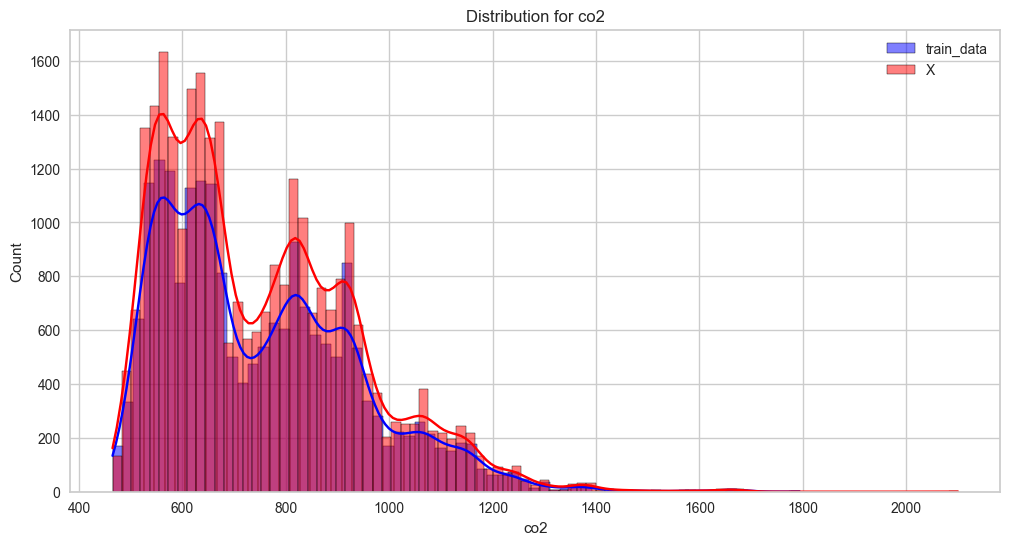

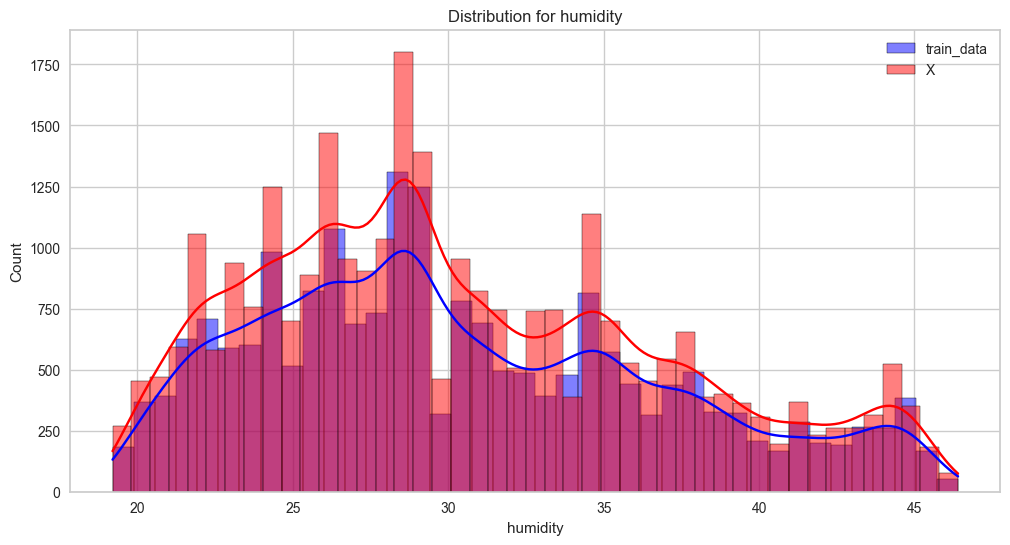

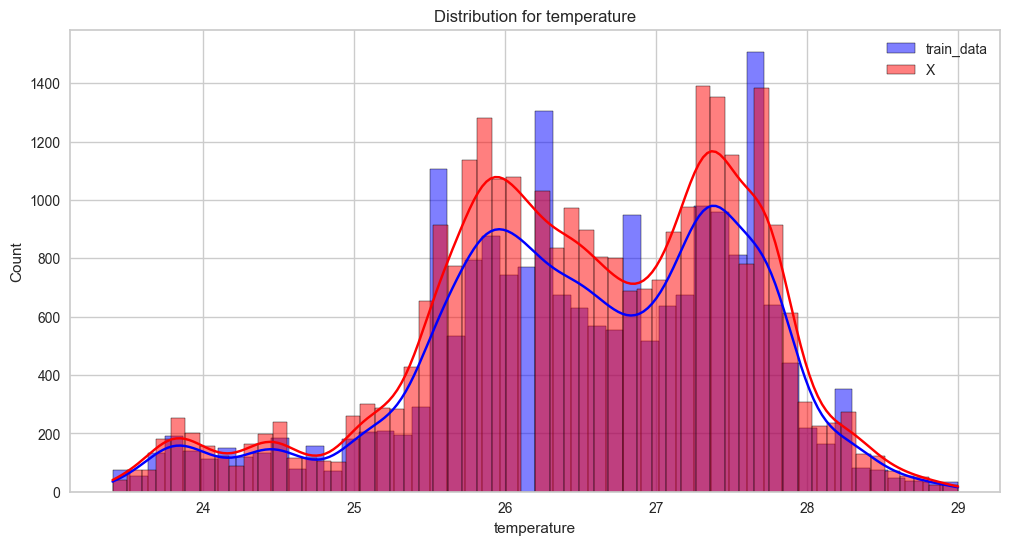

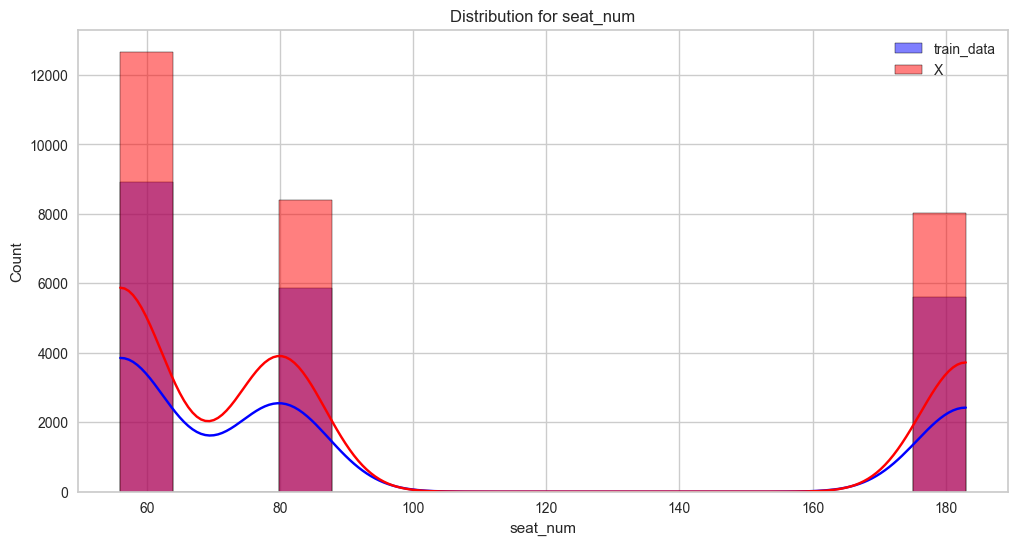

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# train_dataとXの各特徴量についてヒストグラムを描画
for column in X.columns:
    plt.figure(figsize=(12, 6))

    sns.histplot(train_data[column], color="blue", label="train_data", kde=True)
    sns.histplot(X[column], color="red", label="X", kde=True)
    plt.legend()
    plt.title(f"Distribution for {column}")
    plt.show()


In [31]:
from sklearn.ensemble import ExtraTreesRegressor

train_data = get_config("X_train")
train_target = get_config("y_train")
model = ExtraTreesRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_validate(model, train_data, train_target, cv=kf, scoring="r2", n_jobs=-1)
scores


{'fit_time': array([0.519238  , 0.52394581, 0.52476692, 0.52149606, 0.51517892]),
 'score_time': array([0.03590703, 0.03512502, 0.0351491 , 0.03322816, 0.03289509]),
 'test_score': array([0.98322262, 0.98255424, 0.98304035, 0.98349592, 0.98033646])}

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

X = df[["co2", "humidity", "temperature", "seat_num"]]
y = df["y"]

# 交差検証でR2を計算
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_validate(best_model, X, y, cv=kf, scoring="r2", n_jobs=-1)
scores


{'fit_time': array([0.35229182, 0.34569073, 0.34819579, 0.34024692, 0.34974504]),
 'score_time': array([0.04485393, 0.0423522 , 0.03573608, 0.03327513, 0.01508093]),
 'test_score': array([0.98338729, 0.98560974, 0.98115371, 0.98452602, 0.98181184])}